In [1]:
import os,pandas as pd, numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

In [2]:
sns.set(style='white')

In [3]:
source_dir = os.path.join('..','derivatives','0.4.joined')

In [4]:
data = pd.read_csv(os.path.join(source_dir,'all_subject_level.csv'))
data['Condition'] = data['Condition'].replace({1:'Annotated',2:'Video',3:'Original'})
data['AgeGroup'] = data['AgeGroup'].replace({1:'YA',2:'OA'})
data['SciField'] = data['SciField'] - 1
data['Gender'] = data['Gender'] - 1
data['nb_CoR'] = data['nb_CoR']*100
data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']] = data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']].replace({np.nan:0})
data.head()

,sub,Condition,Age,Gender,Major,Major_TEXT,SciDegree,SciDegree_TEXT,EduYears,SciEdu_HS,...,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,Annotated,20.0,1.0,5.0,biomedical-science,NaN,NaN,14,4,...,87,30.0,16,70,9.0,14.0,11.0,11.0,10.0,15.0
1,102,Video,19.0,1.0,5.0,forensic-science,NaN,NaN,12,3,...,83,26.0,16,69,17.0,13.0,14.0,17.0,15.0,13.0
2,103,Original,18.0,0.0,2.0,communications,NaN,NaN,12,3,...,76,28.0,15,61,16.0,13.0,12.0,16.0,9.0,12.0
3,104,Annotated,18.0,0.0,5.0,statistics,NaN,NaN,12,4,...,97,28.0,16,77,17.0,13.0,12.0,14.0,11.0,11.0
4,105,Video,18.0,0.0,5.0,biomedical-science,NaN,NaN,12,6,...,82,28.0,15,62,17.0,9.0,18.0,14.0,12.0,11.0


# Demographics

In [5]:
grp_idx = ['AgeGroup','Condition']
mean_vars = ['Age','Gender','SciField','comp_change','comp_t1','comp_t2']
df = data.groupby(grp_idx).count()[['sub']].merge(
    data.groupby(grp_idx).mean()[mean_vars],on=grp_idx)
df

sub        Age    Gender  SciField  comp_change  \
AgeGroup Condition                                                    
OA       Annotated    8  71.800000  0.625000  0.875000     1.750000   
         Original     8  71.800000  0.875000  0.500000     3.625000   
         Video        8  74.285714  0.857143  0.625000     3.625000   
YA       Annotated   17  18.411765  0.764706  0.294118     2.529412   
         Original    20  18.736842  0.500000  0.300000     4.150000   
         Video       19  19.105263  0.578947  0.105263     3.894737   

                      comp_t1    comp_t2  
AgeGroup Condition                        
OA       Annotated  12.500000  14.250000  
         Original   11.000000  14.625000  
         Video      10.375000  14.000000  
YA       Annotated  10.294118  12.823529  
         Original    9.600000  13.750000  
         Video       9.736842  13.631579

# Group comparisons

In [6]:
vars_of_interest = ['comp_t1','comp_t2','comp_change','nb_CoR','nb_RT',
                    'procspd_RT','NFCS_sum','TSSI_sum',
                    'vocab_sum','SciLit_sum','SciTude_sum']

In [7]:
grps_of_interest = ['Condition','AgeGroup',['AgeGroup','Condition']]

# Correlations
We need to drop all missing data listwise. SPSS does this pairwise for the correlations, but I'm not sure how exactly to replicate that. If we find a way to, I would prefer not to destroy data unnecessarily here.

In [8]:
slim_data = data[['sub','AgeGroup','Condition']+vars_of_interest].dropna()

## Correlation Matrices

Define functions to create the correlation & significance tables and matrices

In [9]:
def corr_table(df):
    corr_df = pd.DataFrame()
    for c in vars_of_interest:
        for d in vars_of_interest:
            corr_df.loc[c,d] = sp.pearsonr(df[c],df[d])[0]
    return(corr_df)

def sig_table(df):
    sig_df = pd.DataFrame()
    for c in vars_of_interest:
        for d in vars_of_interest:
            sig_df.loc[c,d] = sp.pearsonr(df[c],df[d])[1]
    return(sig_df)

In [10]:
def matrix_mask(df):
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(16,5))
    return(mask)

In [11]:
def correlation_matrix(df,title):
    mask = matrix_mask(df)
    fig = sns.heatmap(df, mask=mask, annot=True, cmap='Spectral',
                      fmt='.3f', linewidths=1, center=0)
    fig.set_title(title+'\nCorrelation Coefficients')
    return(fig)

def significance_matrix(df,title):
    mask = matrix_mask(df)
    myColors = (
        (0.4, 0.0, 0.0, 1.00),(0.6, 0.0, 0.0, 0.85),(0.8, 0.0, 0.0, 0.70),(1.0, 0.0, 0.0, 0.55),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
    )
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    fig = sns.heatmap(df, mask=mask, annot=True, cmap=cmap,
                fmt='.3f', linewidths=1, center=0.5
               )
    fig.set_title(title+'\nCorrelation Significance')
    return(fig)

### All AgeGroups,Conditions

In [12]:
corr_df = corr_table(slim_data)
sig_df = sig_table(slim_data)

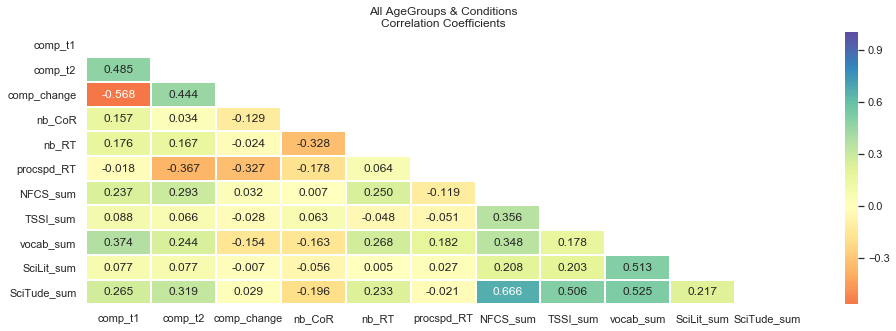

In [13]:
fpath = os.path.join('..','derivatives','figures','allgroups_correlations.png')
fig = correlation_matrix(corr_df,'All AgeGroups & Conditions')
fig.get_figure().savefig(fpath)

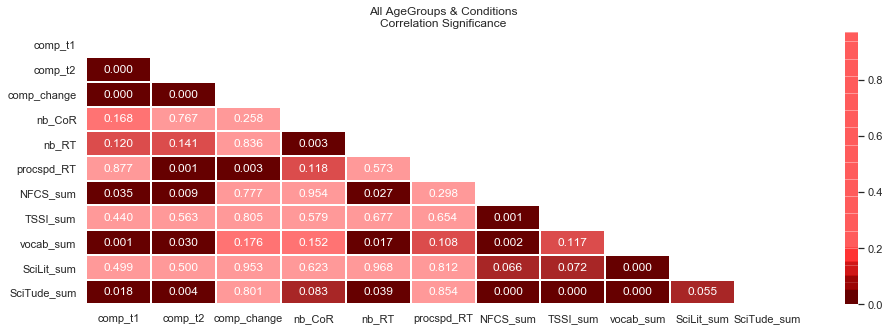

In [14]:
fpath = os.path.join('..','derivatives','figures','allgroups_significance.png')
fig = significance_matrix(sig_df,'All AgeGroups & Conditions')
fig.get_figure().savefig(fpath)

### By AgeGroup

In [15]:
ya_data = slim_data[slim_data['AgeGroup'] == 'YA']
oa_data = slim_data[slim_data['AgeGroup'] == 'OA']

In [16]:
ya_corr_df = corr_table(ya_data)
ya_sig_df = sig_table(ya_data)
oa_corr_df = corr_table(oa_data)
oa_sig_df = sig_table(oa_data)

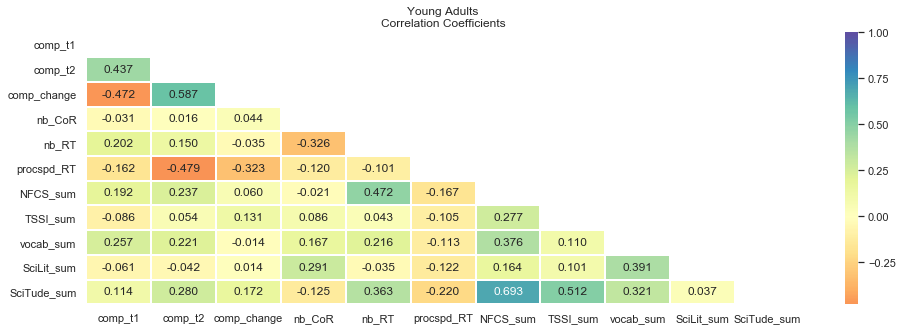

In [17]:
fig = correlation_matrix(ya_corr_df,'Young Adults')
fpath = os.path.join('..','derivatives','figures','ya_correlations.png')
fig.get_figure().savefig(fpath)

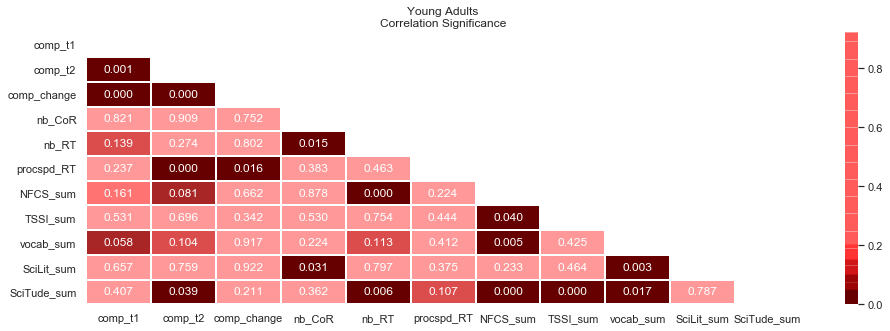

In [18]:
fig = significance_matrix(ya_sig_df,'Young Adults')
fpath = os.path.join('..','derivatives','figures','ya_significance.png')
fig.get_figure().savefig(fpath)

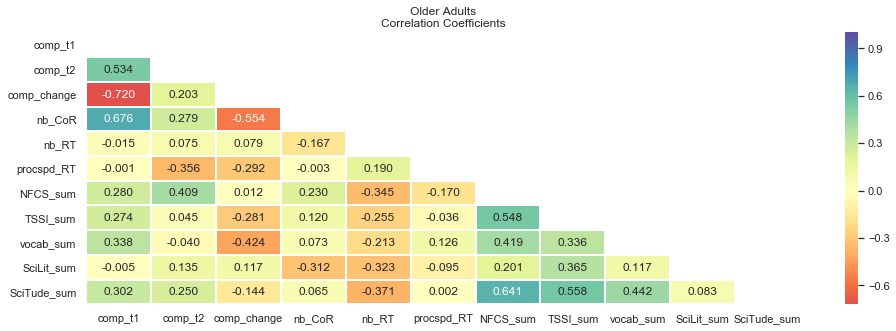

In [19]:
fig = correlation_matrix(oa_corr_df,'Older Adults')
fpath = os.path.join('..','derivatives','figures','oa_correlations.png')
fig.get_figure().savefig(fpath)

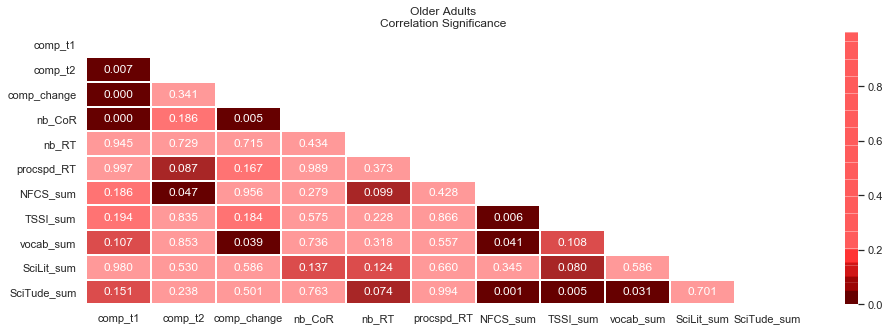

In [20]:
fig = significance_matrix(oa_sig_df,'Older Adults')
fpath = os.path.join('..','derivatives','figures','oa_significance.png')
fig.get_figure().savefig(fpath)

### By Condition

In [21]:
annotated_data = slim_data[slim_data['Condition'] == 'Annotated']
original_data = slim_data[slim_data['Condition'] == 'Original']
video_data = slim_data[slim_data['Condition'] == 'Video']

In [22]:
annotated_corr_df = corr_table(annotated_data)
annotated_sig_df = sig_table(annotated_data)

original_corr_df = corr_table(original_data)
original_sig_df = sig_table(original_data)

video_corr_df = corr_table(video_data)
video_sig_df = sig_table(video_data)

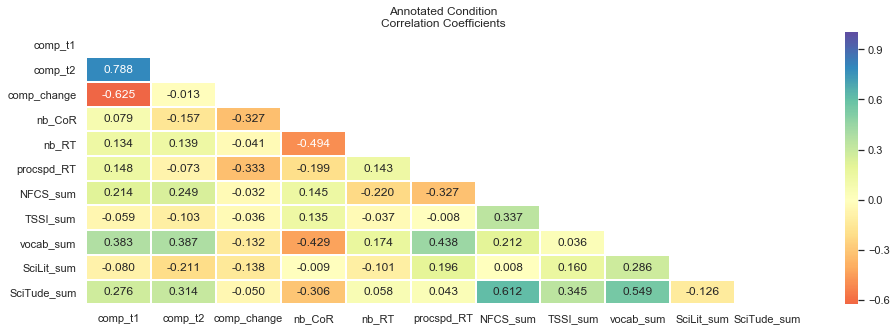

In [23]:
fig = correlation_matrix(annotated_corr_df,'Annotated Condition')
fpath = os.path.join('..','derivatives','figures','annot_correlations.png')
fig.get_figure().savefig(fpath)

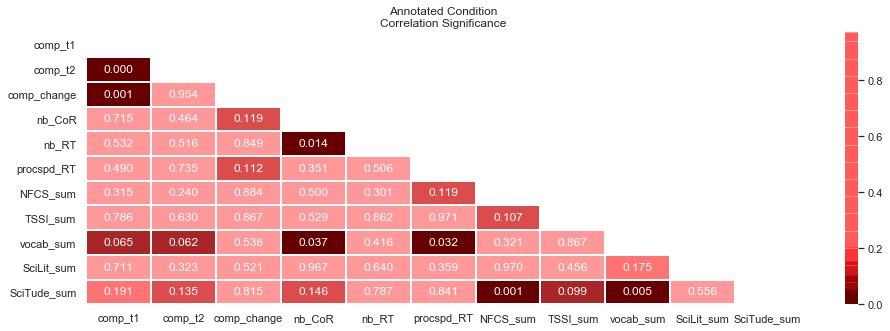

In [24]:
fig = significance_matrix(annotated_sig_df,'Annotated Condition')
fpath = os.path.join('..','derivatives','figures','annot_significance.png')
fig.get_figure().savefig(fpath)

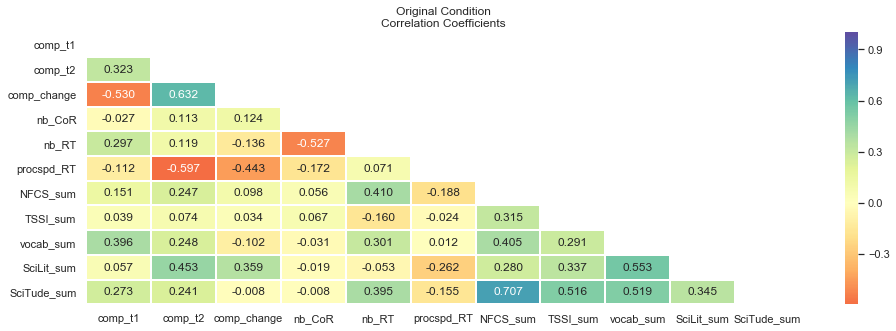

In [25]:
fig = correlation_matrix(original_corr_df,'Original Condition')
fpath = os.path.join('..','derivatives','figures','orig_correlations.png')
fig.get_figure().savefig(fpath)

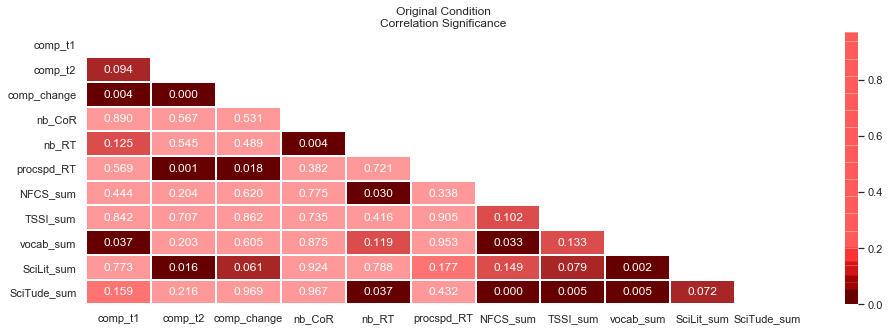

In [26]:
fig = significance_matrix(original_sig_df,'Original Condition')
fpath = os.path.join('..','derivatives','figures','orig_significance.png')
fig.get_figure().savefig(fpath)

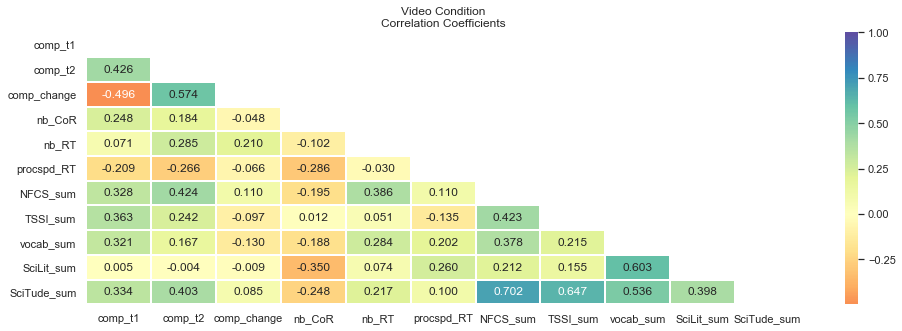

In [27]:
fig = correlation_matrix(video_corr_df,'Video Condition')
fpath = os.path.join('..','derivatives','figures','video_correlations.png')
fig.get_figure().savefig(fpath)

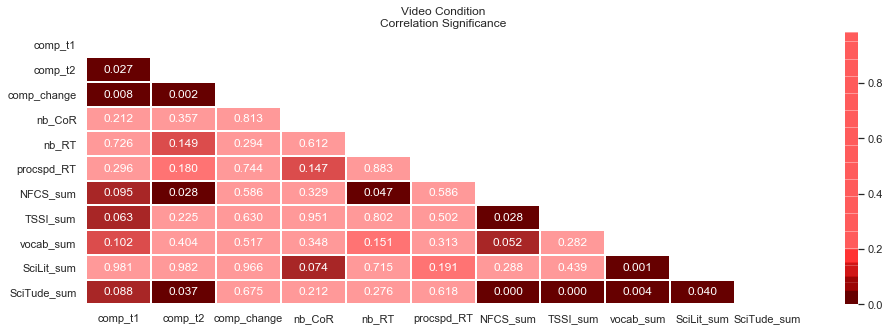

In [28]:
fig = significance_matrix(video_sig_df,'Video Condition')
fpath = os.path.join('..','derivatives','figures','video_significance.png')
fig.get_figure().savefig(fpath)

## Correlograms

<Figure size 1152x360 with 0 Axes>

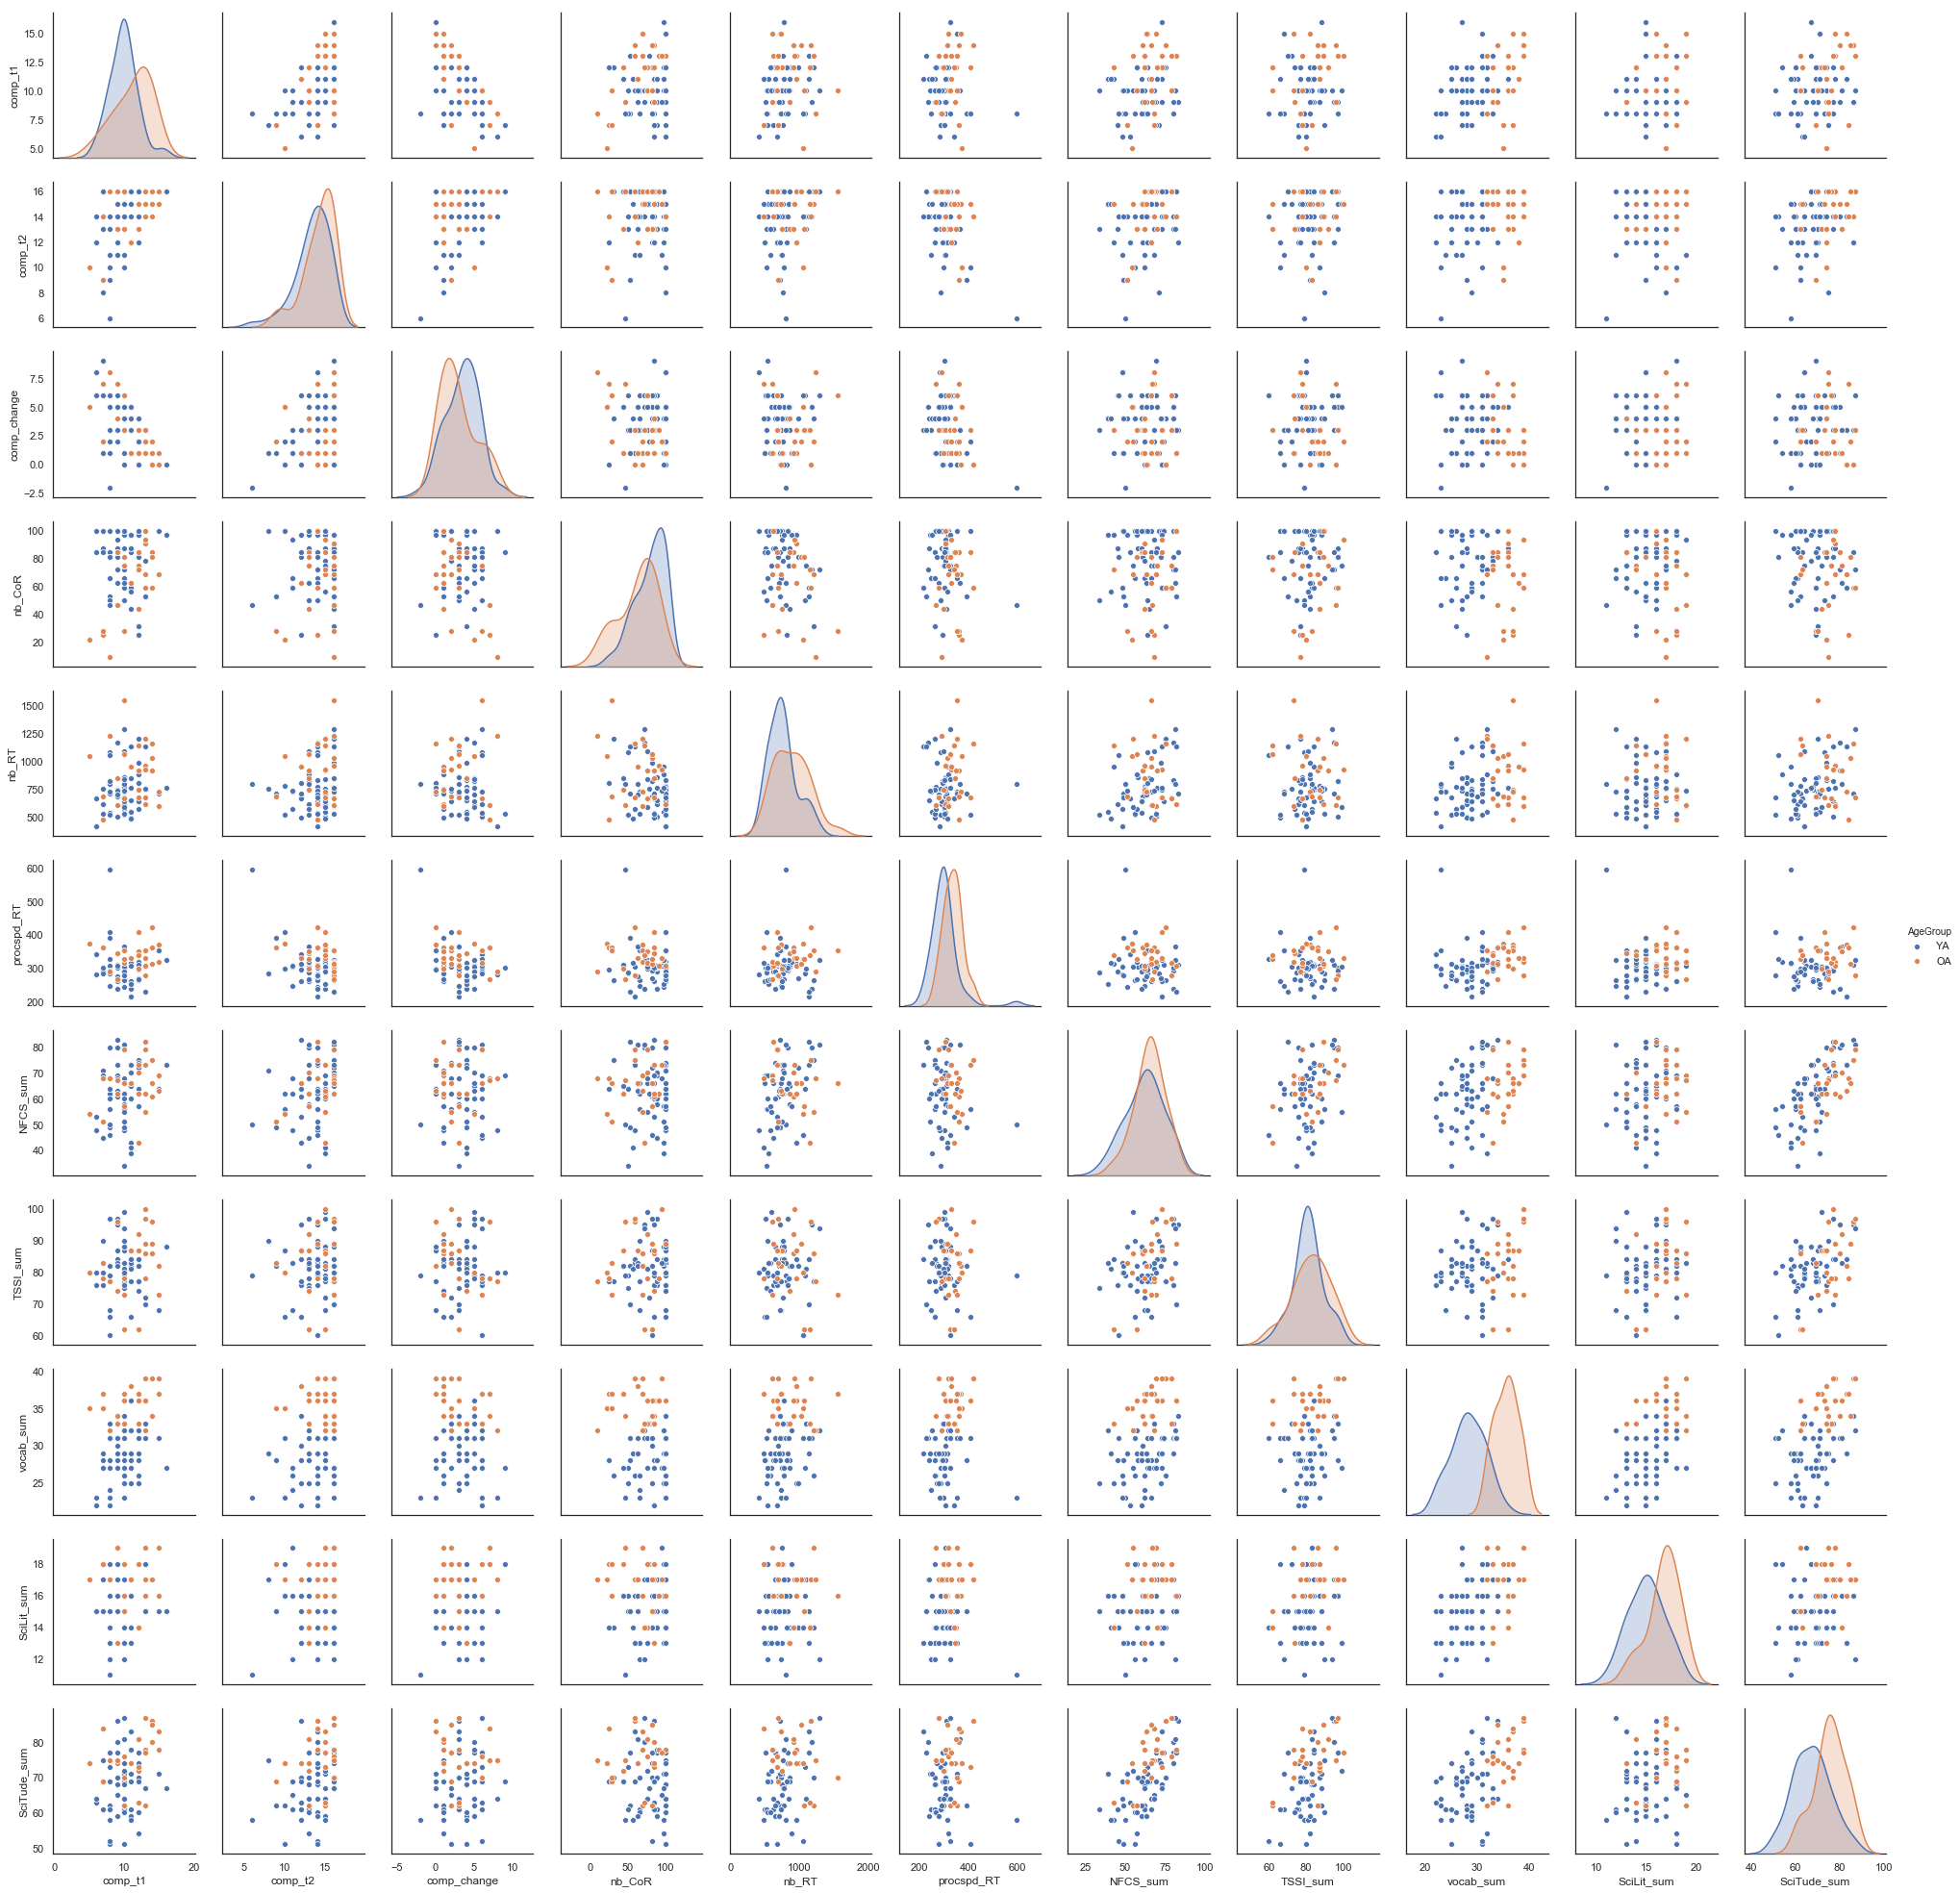

In [29]:
fpath = os.path.join('..','derivatives','figures','AgeGroup_correlogram.png')
plt.figure(figsize=(16,5))
df = slim_data[vars_of_interest+['AgeGroup','Condition']]
fig = sns.pairplot(df,hue='AgeGroup')
# for i,j in zip(*np.triu_indices_from(fig.axes, 1)):
#     fig.axes[i, j].set_visible(False)
fig.savefig(fpath)

<Figure size 1152x360 with 0 Axes>

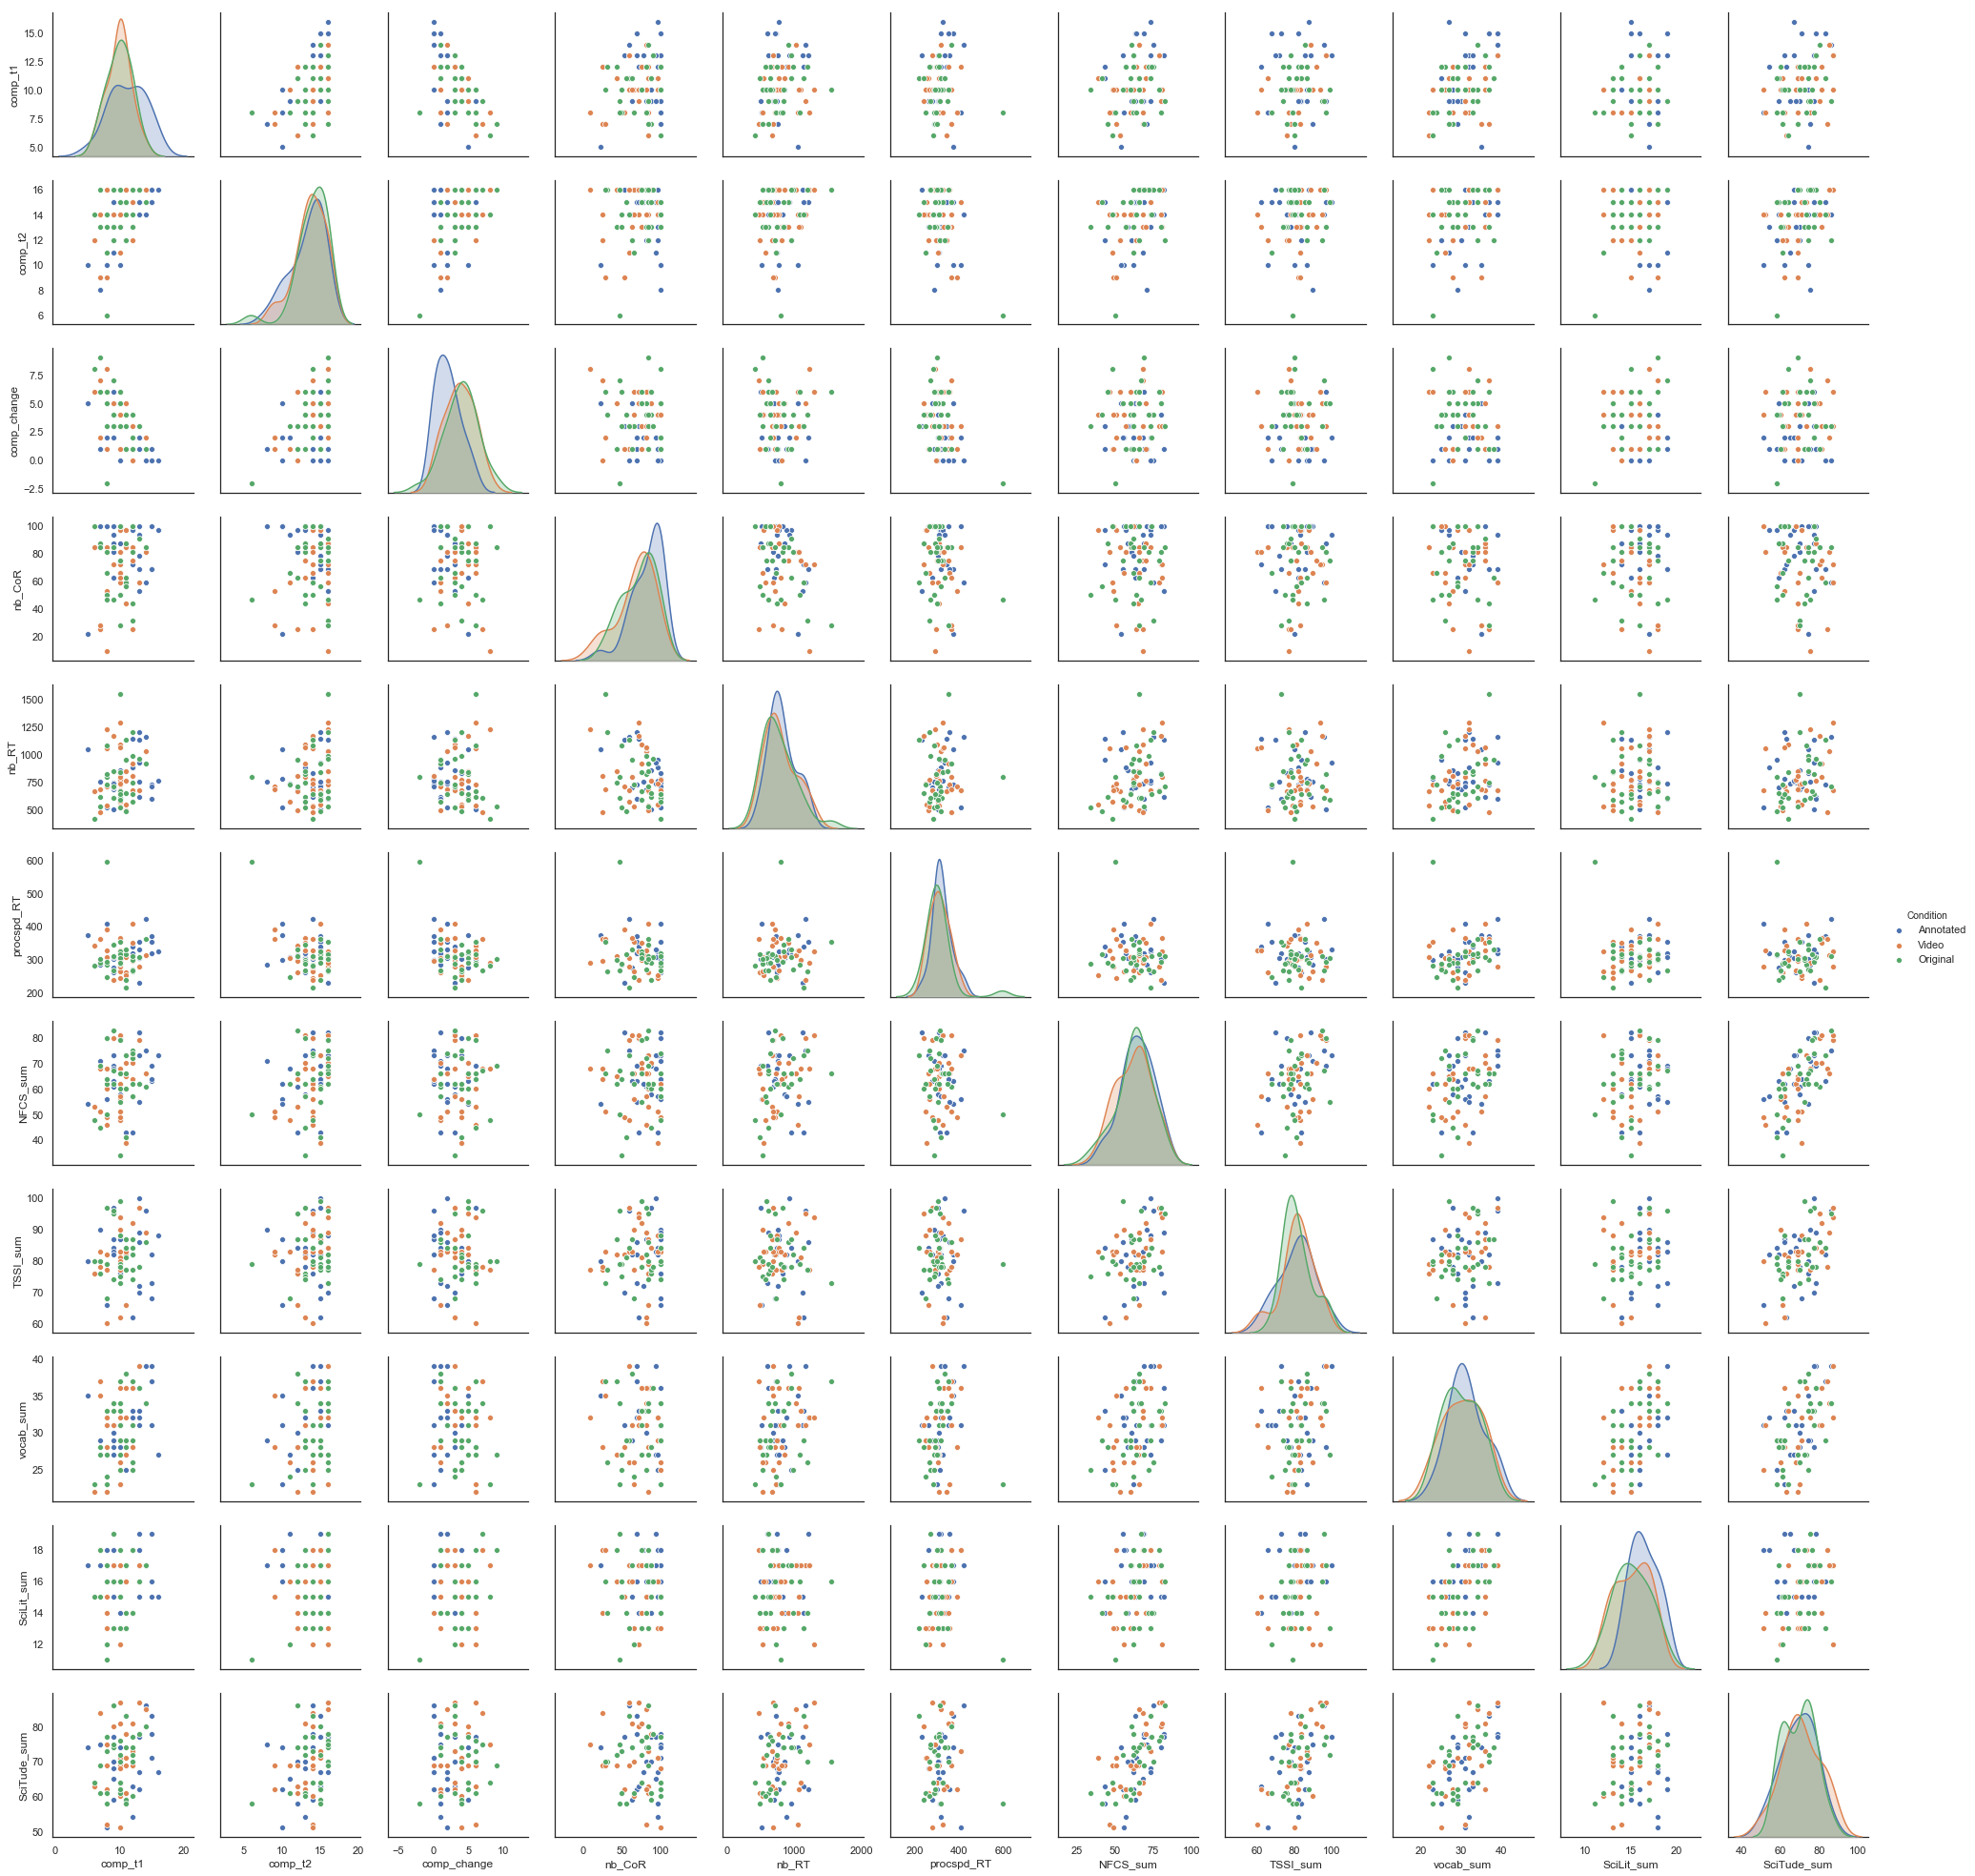

In [30]:
fpath = os.path.join('..','derivatives','figures','Condition_correlogram.png')
plt.figure(figsize=(16,5))
df = slim_data[vars_of_interest+['AgeGroup','Condition']]
fig = sns.pairplot(df,hue='Condition')
# for i,j in zip(*np.triu_indices_from(fig.axes, 1)):
#     fig.axes[i, j].set_visible(False)
fig.savefig(fpath)

# Vertical Bar plots

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


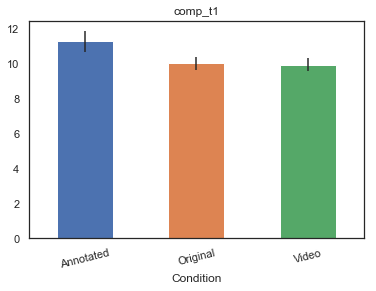

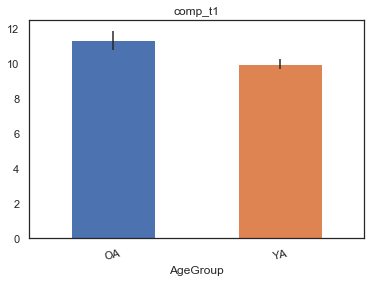

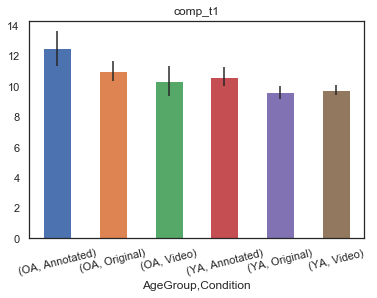

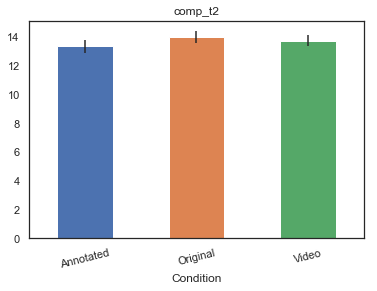

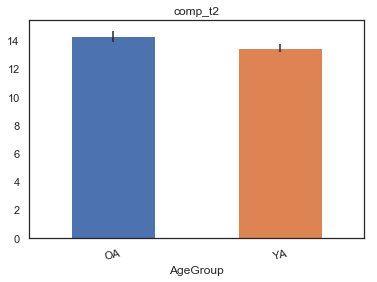

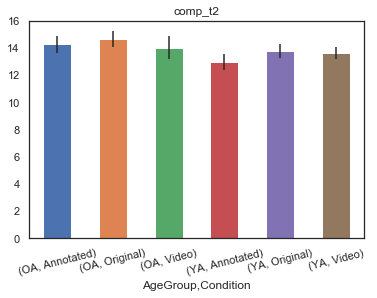

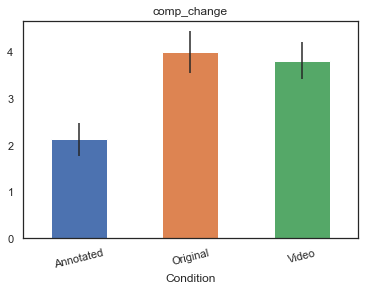

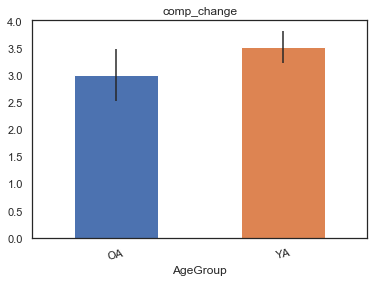

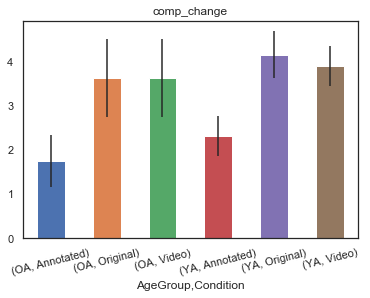

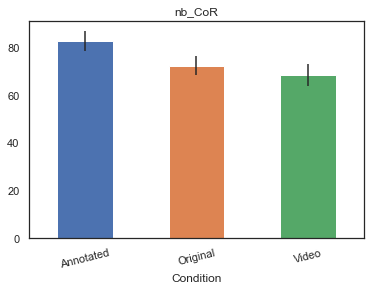

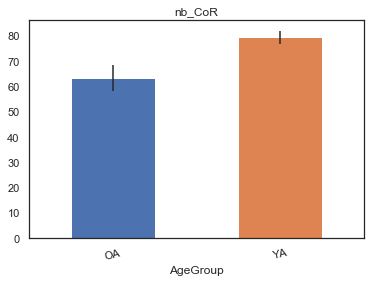

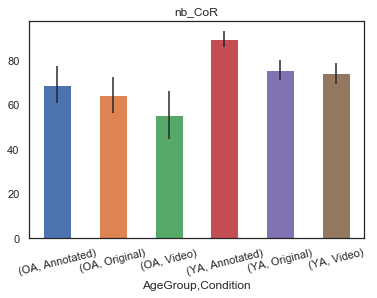

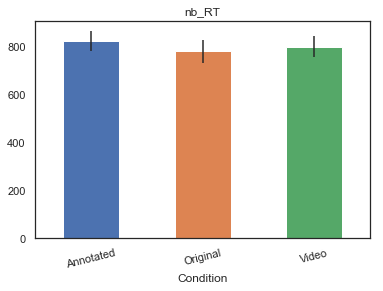

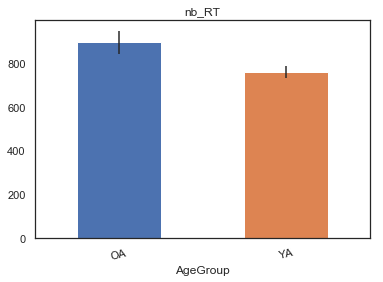

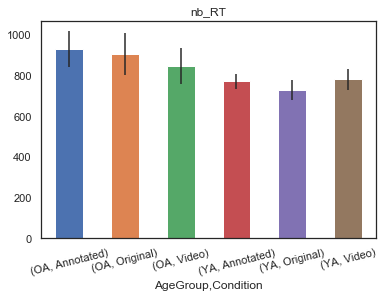

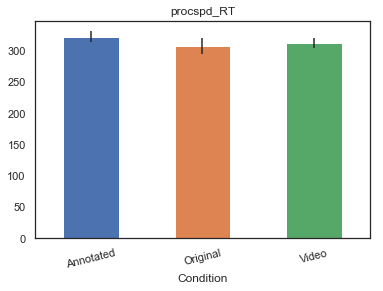

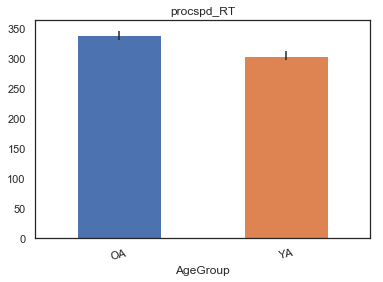

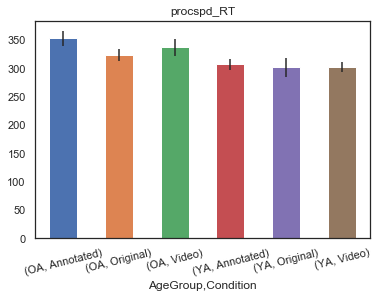

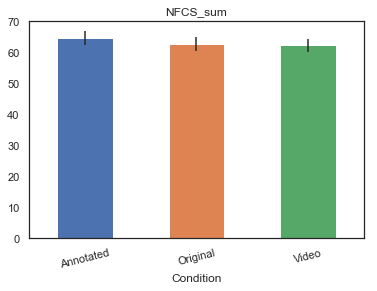

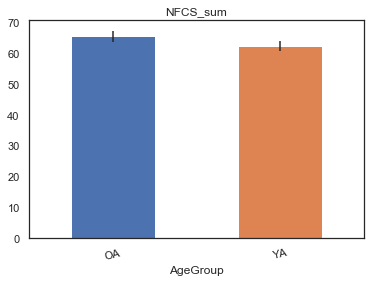

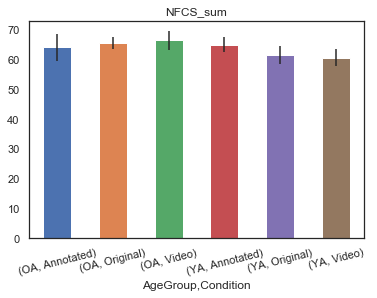

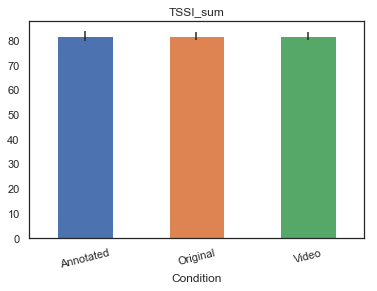

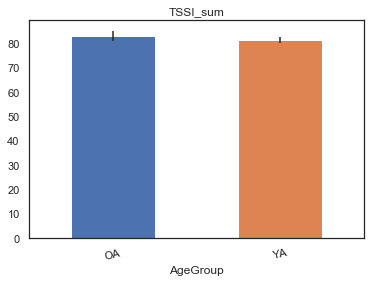

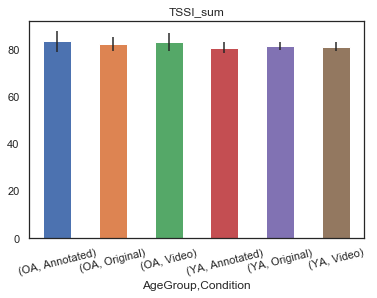

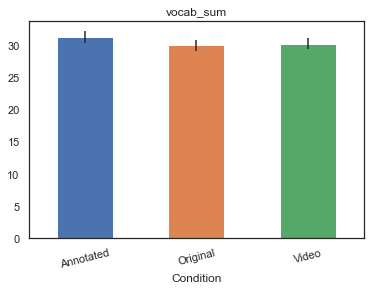

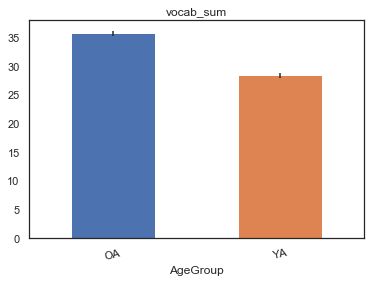

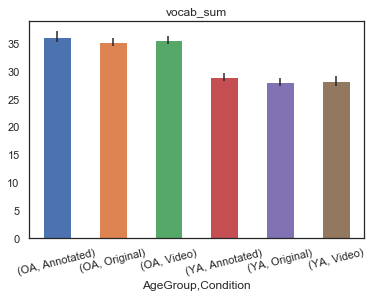

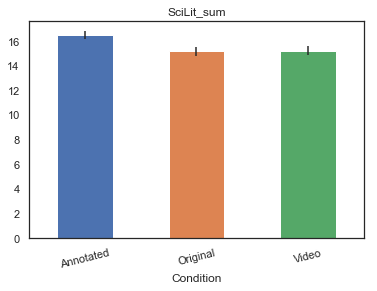

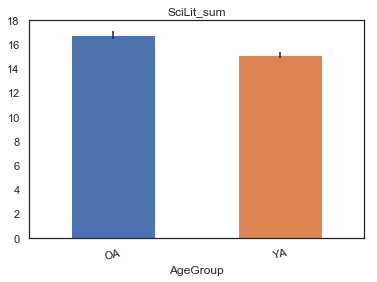

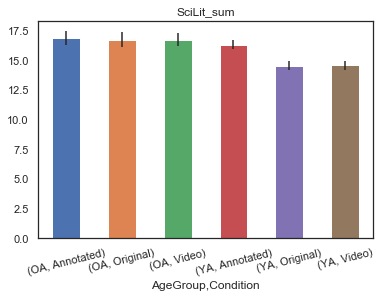

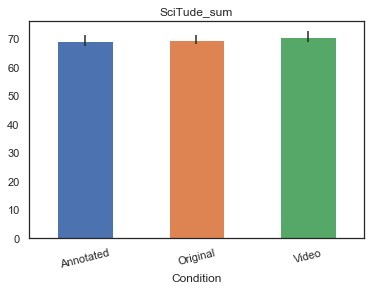

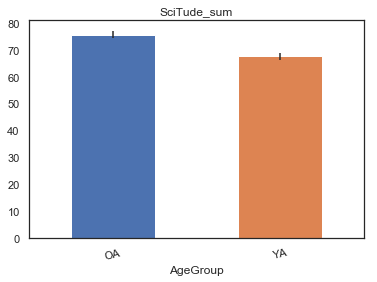

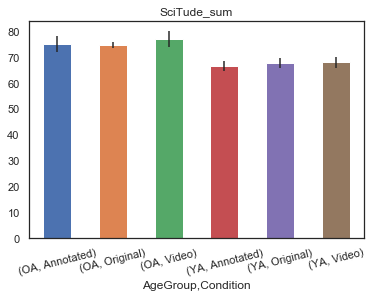

In [31]:
for var in vars_of_interest:
    for grp in grps_of_interest:
        fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'.png')
        means = slim_data.groupby(grp).mean()
        sem = slim_data.groupby(grp).sem()
        plot = means.plot.bar(
            y=var,yerr=sem,xticks=np.arange(0,max(data[var]),
                                            step=np.rint(max(data[var])*(1/5))),
            legend=False,title=var,rot=14
        ).get_figure().savefig(fpath, bbox_inches='tight')

# Horizontal Swarm, Strip, Box, Bar plots

..\derivatives\figures\comp_t1_Condition_swarm
..\derivatives\figures\comp_t2_Condition_swarm
..\derivatives\figures\comp_change_Condition_swarm
..\derivatives\figures\nb_CoR_Condition_swarm
..\derivatives\figures\nb_RT_Condition_swarm
..\derivatives\figures\procspd_RT_Condition_swarm
..\derivatives\figures\NFCS_sum_Condition_swarm
..\derivatives\figures\TSSI_sum_Condition_swarm
..\derivatives\figures\vocab_sum_Condition_swarm
..\derivatives\figures\SciLit_sum_Condition_swarm
..\derivatives\figures\SciTude_sum_Condition_swarm
..\derivatives\figures\comp_t1_AgeGroup_swarm
..\derivatives\figures\comp_t2_AgeGroup_swarm
..\derivatives\figures\comp_change_AgeGroup_swarm
..\derivatives\figures\nb_CoR_AgeGroup_swarm
..\derivatives\figures\nb_RT_AgeGroup_swarm
..\derivatives\figures\procspd_RT_AgeGroup_swarm
..\derivatives\figures\NFCS_sum_AgeGroup_swarm
..\derivatives\figures\TSSI_sum_AgeGroup_swarm
..\derivatives\figures\vocab_sum_AgeGroup_swarm
..\derivatives\figures\SciLit_sum_AgeGroup_swa

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


..\derivatives\figures\comp_t2_Condition_bar
..\derivatives\figures\comp_change_Condition_bar
..\derivatives\figures\nb_CoR_Condition_bar
..\derivatives\figures\nb_RT_Condition_bar
..\derivatives\figures\procspd_RT_Condition_bar
..\derivatives\figures\NFCS_sum_Condition_bar
..\derivatives\figures\TSSI_sum_Condition_bar
..\derivatives\figures\vocab_sum_Condition_bar
..\derivatives\figures\SciLit_sum_Condition_bar
..\derivatives\figures\SciTude_sum_Condition_bar
..\derivatives\figures\comp_t1_AgeGroup_bar
..\derivatives\figures\comp_t2_AgeGroup_bar
..\derivatives\figures\comp_change_AgeGroup_bar
..\derivatives\figures\nb_CoR_AgeGroup_bar
..\derivatives\figures\nb_RT_AgeGroup_bar
..\derivatives\figures\procspd_RT_AgeGroup_bar
..\derivatives\figures\NFCS_sum_AgeGroup_bar
..\derivatives\figures\TSSI_sum_AgeGroup_bar
..\derivatives\figures\vocab_sum_AgeGroup_bar
..\derivatives\figures\SciLit_sum_AgeGroup_bar
..\derivatives\figures\SciTude_sum_AgeGroup_bar
..\derivatives\figures\comp_t1_AgeGr

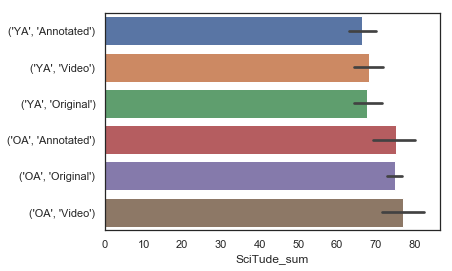

In [32]:
plots_dict = {'swarm':sns.swarmplot,
              'strip':sns.stripplot,
              'box':sns.boxplot,
              'bar':sns.barplot}

for plot in plots_dict.keys():
    for grp in grps_of_interest:
        for var in vars_of_interest:
            try: fig.clear()
            except AttributeError as e: fig=None
            
            fname = var+'_'+''.join(grp)+'_'+plot
            fpath = os.path.join('..','derivatives','figures',fname)
            print(fpath)
            
            df = slim_data.set_index(grp)
            fig = plots_dict[plot](x=var, y=df.index, data=df)
            fig.get_figure().savefig(fpath, bbox_inches='tight')